In [1]:
import pandas as pd
import argparse
import random
import time
import os
import duckdb
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from crptmidfreq.config_loc import *
from crptmidfreq.featurelib.lib_v1 import *
from crptmidfreq.strats import *
from crptmidfreq.utils.common import to_csv

plt.style.use('ggplot')


g_folder = 'res_exploration_v1'
g_reg = StepperRegistry()
clean_folder(g_folder)

/Users/sachadrevet/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/sachadrevet/anaconda3/lib/python3.11/site-packages/dask/dataframe/__init__.py:49: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
2025-04-03 07:56:31 - Cleaning folder res_exploration_v1


In [2]:
featd=prepare_klines(start_date='2024-09-01',
                   end_date='2026-01-01',
                   tokens=['ETHUSDT','BTCUSDT','BNBUSDT','ADAUSDT'],
                   folder=g_folder,
                   name=None,
                   r=g_reg
                   )
featd['turnover_log']=np.log(1+featd['turnover'])
featd['univ'] = np.ones_like(featd['dtsi'],dtype=np.int64)
unit_day = 60*24
cfg = dict(
        windows_macd_turnover=[[1_000, 10_000]],
)
featd=turnover_excess(featd,folder=g_folder,name=None,r=g_reg,cfg=cfg)

2025-04-03 07:56:31 - Missing key=use_lazy_dict in cfg for kmeans_sret -- will use default value
2025-04-03 07:56:31 - Missing key=window_volume_wgt in cfg for kmeans_sret -- will use default value
2025-04-03 07:56:31 - prepare_klines start_date=2024-09-01 end_date=2026-01-01
2025-04-03 07:56:31 - Reading data from DuckDB
2025-04-03 07:56:35 - Stepper creating instance res_exploration_v1 None_cnt_exists
2025-04-03 07:56:37 - Stepper creating instance res_exploration_v1 None_close_diff1
2025-04-03 07:56:37 - Stepper creating instance res_exploration_v1 None_tret_clip
2025-04-03 07:56:38 - Stepper creating instance res_exploration_v1 None_turnover_ewm43200
2025-04-03 07:56:39 - Stepper creating instance res_exploration_v1 None_turnover_ewm43200_qtl
2025-04-03 07:56:40 - Missing key=window_appops in cfg for pnl_feats -- will use default value
2025-04-03 07:56:40 - Stepper creating instance res_exploration_v1 None_turnover_log_diff1
2025-04-03 07:56:40 - Stepper creating instance res_explo

In [3]:
df = pd.DataFrame({k: featd[k] for k in featd.keys()})

sigf_turnover_log_diff1_csdemean_cumsum_macd1000x10000


<Axes: xlabel='close_time'>

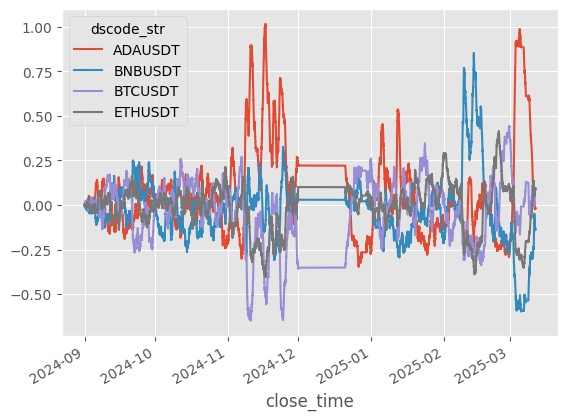

In [4]:
col=[x for x in df.columns if x.startswith('sigf_turnover') and not ('appops' in x)][0]
print(col)
pdf=df.pivot_table(index='close_time',columns='dscode_str',values=col)
pdf.plot()